In [1]:
#Load necessary packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(ggplot2)
library("gridExtra")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

In [2]:
# Read the data from 2017 matches
matches_2017 <- read_csv(url('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv'))

#Read the data from 2018 matches
matches_2018 <- read_csv(url('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv'))

#Combine the 2017 and 2018 datasets
matches_17_18 <- rbind(matches_2017, matches_2018)


#select relevant predictors and seperate into winner/loser datasets

matches_winner<-matches_17_18|>
select(winner_ht,winner_age, w_ace, winner_rank,w_df,w_svpt,w_1stWon,w_2ndWon,
       w_SvGms,w_df)


matches_loser<-matches_17_18|>
select(loser_ht,loser_age, l_ace, loser_rank,l_df,l_svpt,l_1stWon,l_2ndWon,l_SvGms,)


#combine winner/loser datasets
colnames(matches_winner) <- c( "height","age","aces","rank","double_faults",
                             "serve_points","first_serve_points","second_serve_points","serve_games")
colnames(matches_loser) <- c( "height","age","aces","rank","double_faults",
                             "serve_points","first_serve_points","second_serve_points","serve_games")
#combine winner/loser datasets
matches<-rbind(matches_loser,matches_winner)|>

#mutate aces to be factor
mutate(aces=as.factor(aces))|>
#omit missing values
na.omit()



 matches




Rows: 2911 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2897 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


height,age,aces,rank,double_faults,serve_points,first_serve_points,second_serve_points,serve_games
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
170,21.2,0,100,1,82,33,13,11
185,20.4,11,141,3,113,39,27,12
183,32.0,1,25,4,76,29,16,12
193,33.6,10,34,2,58,27,7,10
183,20.7,1,160,6,74,23,13,9
193,24.1,5,26,8,74,29,12,11
188,27.0,2,33,3,57,21,7,8
185,36.6,9,54,8,94,29,30,14
188,25.7,9,78,5,87,33,24,16


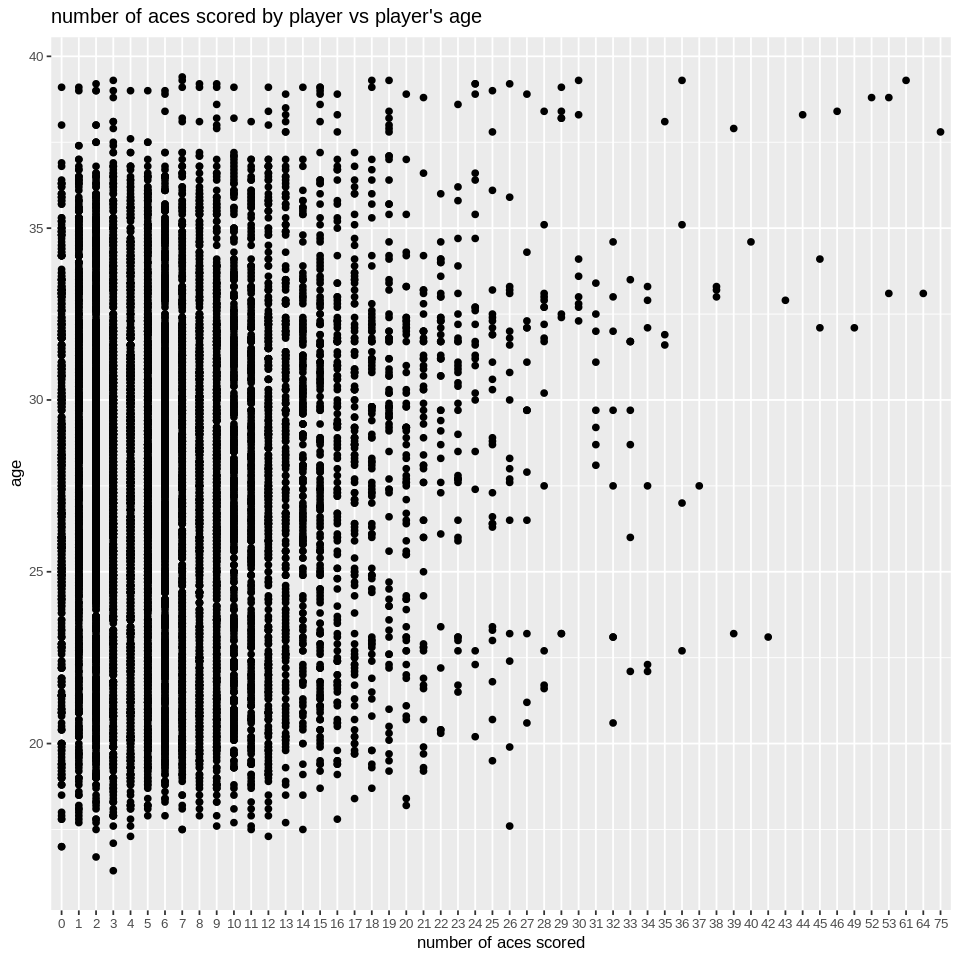

In [19]:
#preliminary exploration of predictors
#age
options(repr.plot.width = 8, repr.plot.height = 8)
  
match_age <- ggplot(matches, aes(x = aces, y =age )) +
  geom_point()+
labs(x="number of aces scored",y="age")+
ggtitle("number of aces scored by player vs player's age")+
  theme(text = element_text(size = 10))
match_age 


 


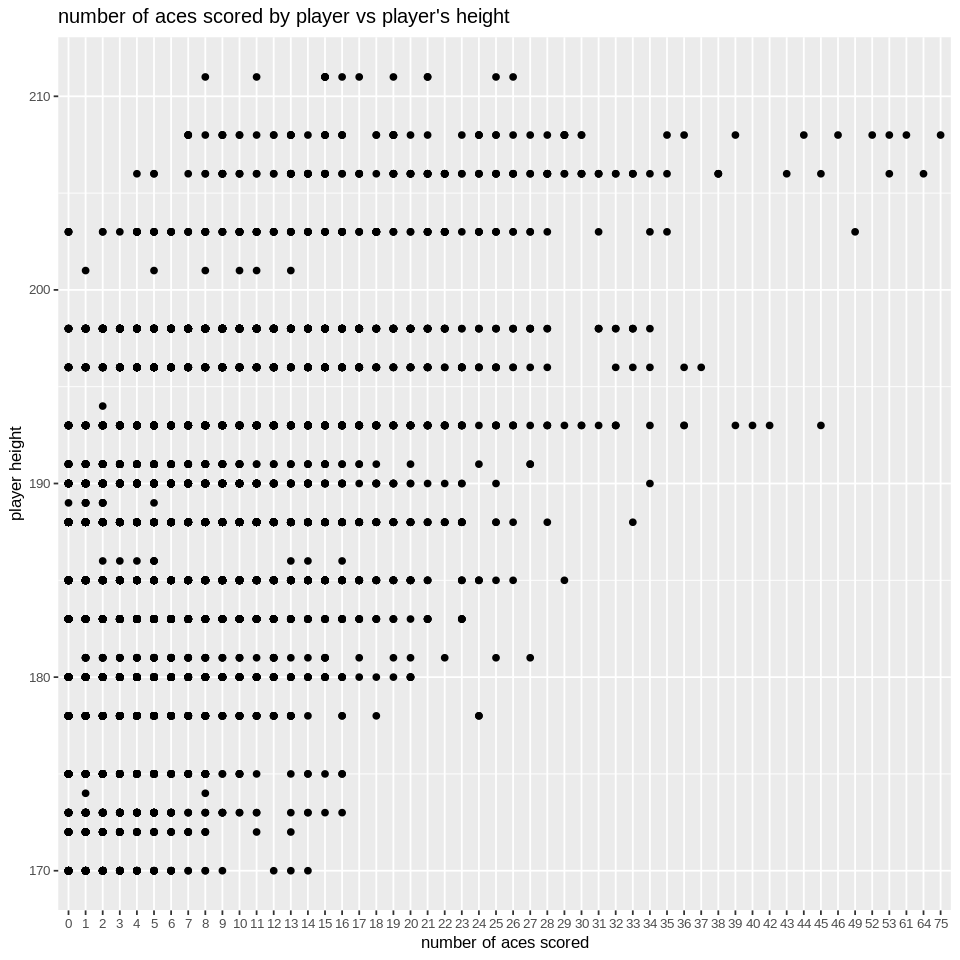

In [22]:
#preliminary exploration of predictors
#height
options(repr.plot.width = 8, repr.plot.height = 8)
  
match_height <- ggplot(matches, aes(x = aces, y =height )) +
  geom_point()+
labs(x="number of aces scored",y="player height")+
ggtitle("number of aces scored by player vs player's height")+
  theme(text = element_text(size = 10))
match_height 


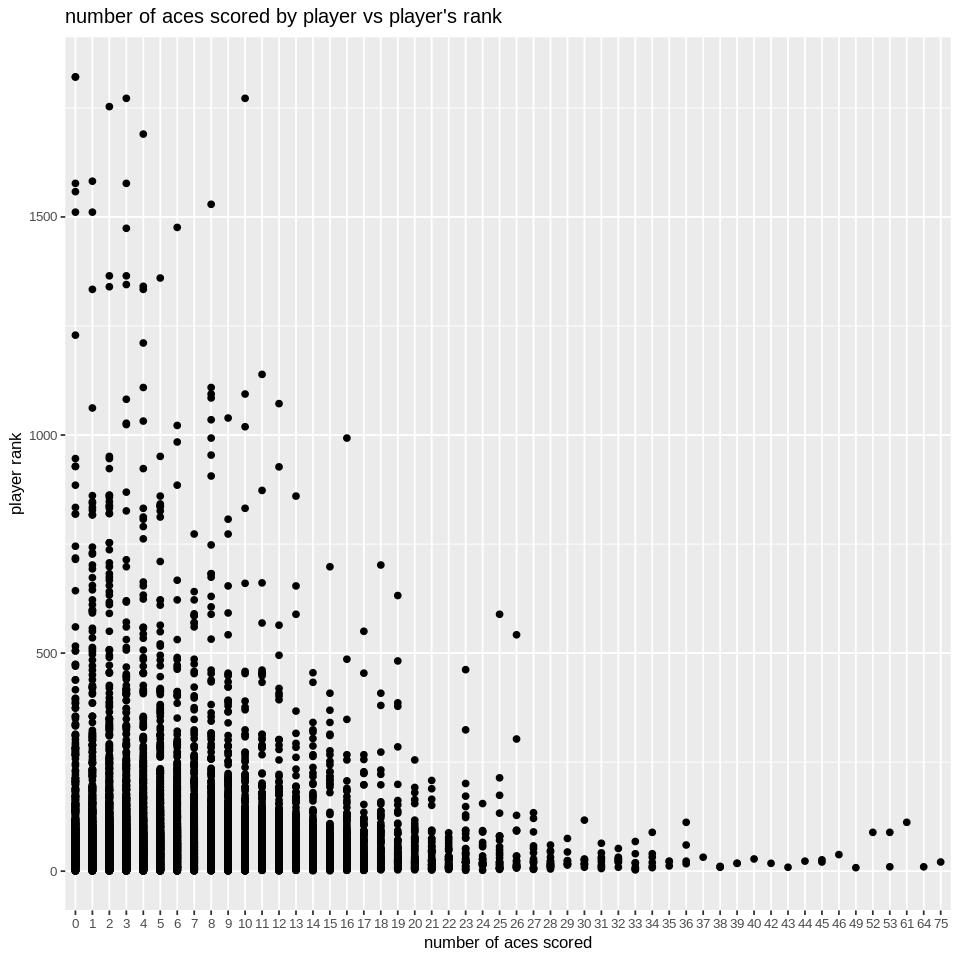

In [23]:
#preliminary exploration of predictors
#rank
options(repr.plot.width = 8, repr.plot.height = 8)
  
match_rank <- ggplot(matches, aes(x = aces, y =rank )) +
  geom_point()+
labs(x="number of aces scored",y="player rank")+
ggtitle("number of aces scored by player vs player's rank")+
  theme(text = element_text(size = 10))
match_rank

In [4]:
#split the data into training and testing sets
set.seed(4321) 
match_splt <- initial_split(matches, prop = 3/4
                           , strata = aces)
match_train <- training(match_splt)
match_test <- testing(match_splt)


In [5]:
set.seed(4321) 
#standardize data and create tuning model
tune_recipe<- recipe(aces ~ height+age+rank+double_faults+
                             serve_points+ first_serve_points+second_serve_points+serve_games, data = match_train) |>
step_scale(all_predictors())|>
    step_center(all_predictors())


knn_tune<- nearest_neighbor(weight_func ="rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")



In [18]:
set.seed(4321) 
#preform 5 fold cross validation
tune_vfold <- vfold_cv(match_train, v = 5, strata = aces)

tune_fit <- workflow() |>
       add_recipe(tune_recipe) |>
       add_model(knn_tune) |>
      tune_grid(resamples = tune_vfold, grid=10)|>
#Collect the metrics from the workflow analysis
collect_metrics()
accuracies<-tune_fit|>
filter(.metric=="accuracy")



ERROR: Error in tune_grid.workflow(add_model(add_recipe(workflow(), tune_recipe), : object 'gridvals' not found


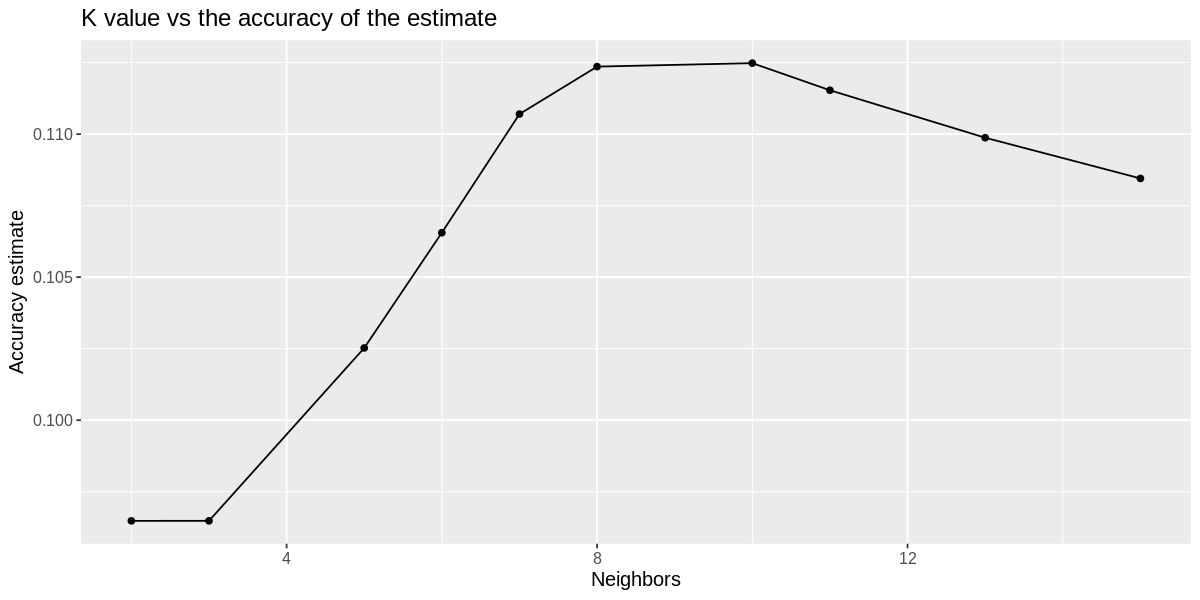

In [10]:
set.seed(4321) 
#Plot the  𝑘  vs the accuracy
options(repr.plot.height = 5, repr.plot.width = 10)

cross_val_plot<-ggplot(accuracies, aes(x=neighbors, y=mean))+
geom_point()+
geom_line()+
labs(x="Neighbors",y="Accuracy estimate")+
theme(text=element_text(size=12))+
ggtitle("K value vs the accuracy of the estimate")

cross_val_plot

Based on the graph above, k=10 has the highest accuracy estimate. Therefor our model will use k=10

In [14]:
set.seed(4321) 
#build classification model
match_recipe<- recipe(aces ~ height+age+rank+double_faults+
                             serve_points+ first_serve_points+second_serve_points+serve_games, data = match_train) |>
step_scale(all_predictors())|>
    step_center(all_predictors())


knn_spec<- nearest_neighbor(weight_func ="rectangular", neighbors = 10) |>
       set_engine("kknn") |>
       set_mode("classification")

match_fit <- workflow() |>
      add_recipe(match_recipe) |>
       add_model(knn_spec) |>
fit(data = match_train)





In [16]:
set.seed(4321)
#predict responding variable on test set
match_pred<- predict(match_fit,match_test) |>
      bind_cols(match_test)

#report accuracy of prediction
match_metrics<- match_pred|>
    metrics(truth=aces, estimate= .pred_class)|>
    filter(.metric== "accuracy")

#report confusion matrix
match_conf_mat<-match_pred|>
    conf_mat(truth=aces, estimate=.pred_class)
match_pred
match_metrics
match_conf_mat

.pred_class,height,age,aces,rank,double_faults,serve_points,first_serve_points,second_serve_points,serve_games
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,185,20.4,11,141,3,113,39,27,12
2,183,17.8,2,351,4,46,14,12,9
2,188,33.5,2,70,2,53,24,8,9
3,183,24.4,0,474,2,75,31,13,9
1,188,20.6,2,104,3,56,18,7,8
0,178,32.8,0,86,1,43,15,3,7
2,181,27.4,4,101,3,42,14,5,7
6,183,26.2,14,199,1,100,44,25,17
2,185,29.3,2,74,1,69,40,10,12


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.1119801


          Truth
Prediction  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
        0  19 16 24  6 11  8  4  1  2  0  3  0  0  0  1  0  1  0  0  0  0  0  0
        1  18 51 47 38 26 28 16 13  6  3  5  0  1  1  1  0  0  0  0  0  0  0  0
        2  31 47 38 51 34 34 23 19 13 10  9  6  3  1  1  1  0  0  0  0  0  0  0
        3  23 33 47 49 38 36 38 16 28 14  9  9  7  1  1  1  0  0  1  0  0  0  0
        4  10 20 42 29 34 42 32 27 17 22 10  9  8  2  5  2  1  1  0  0  0  1  0
        5  15 19 26 34 32 29 26 24 13 13 10 11  6  5  0  3  4  1  1  4  0  1  0
        6   9 15 18 24 27 32 24 19 10 12  8 13 10  5  5  4  4  1  4  0  0  0  0
        7   3  8 15  8 19 24 15 13 16 11 13  8  8  5  1  3  4  3  0  1  1  1  0
        8   3  4  7 11 22 17 10 11 16 12 10  9  9  8  6  3  3  6  0  1  2  0  1
        9   3  4 11 10  5 11 15 10 11  9  7  5 11  2  3  6  3  4  3  0  0  1  1
        10  1  3  4  5  3 12 11 12  8 12  9  4 10  2  5  4  2  4  2  0  1  1  2
        11  0  1  1  4  

In [17]:
ace_vfold <- vfold_cv(ace_training, v = 5, strata = ace)
ace_workflow <- workflow() |>
    add_recipe(ace_recipe) |>
    add_model(ace_spec)
ace_workflow
gridvals <- tibble(neighbors = seq(from = 1, to = 200))
ace_results <- ace_workflow |>
    tune_grid(resamples = ace_vfold, grid = gridvals) |>
    collect_metrics()
ace_min <- ace_results |>
    filter(.metric == "rmse") |>
    arrange(mean) |>
    slice(1)
ace_min


ERROR: [1m[33mError[39m in [1m[1m`arrange()`:[22m
[1m[22m[33m![39m Problem with the implicit `transmute()` step.
[31m✖[39m Problem while computing `..1 = mean`.
[31m✖[39m `..1` must be a vector, not a function.
